## Comparing Changes in Geom Areas

### US/Canada level 1

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

In [4]:
import pandas as pd

### Data Retrieval

In [5]:
npe = gpd.read_parquet("nonplanar_enforced.parquet") #non planar enforced data


In [6]:
pe = gpd.read_parquet("planar_enforced.parquet") # planar enforced


In [7]:
npe = npe.set_crs('epsg:3857')
pe= pe.set_crs('epsg:3857')

##  Area of Non planar Enforced data and planar enforced data


- Check all areas before and after geoplanar
- Compare /Contrast
- Explicitly state which ones changed

In [8]:
non_planar_enforced_area = npe
planar_enforced_area = pe

In [9]:
non_planar_enforced_area = non_planar_enforced_area.set_crs('epsg:3857')
planar_enforced_area= planar_enforced_area.set_crs('epsg:3857')

In [10]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area

In [11]:
print(non_planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.749831
4      45.131677
         ...    
59    136.017824
60      0.670316
61    206.184961
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [12]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area

In [13]:
print(planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.750731
4      45.131687
         ...    
59    136.010019
60      0.670316
61    206.177792
62     90.424490
63     87.600875
Length: 64, dtype: float64


##  Comparison of Areas

In [14]:
planar_enforced_area['area'].isin(non_planar_enforced_area['area']).value_counts()

True     43
False    21
Name: area, dtype: int64

### Identify the Areas of Geom  SAME for both data sets

In [15]:
df_common = planar_enforced_area.loc[planar_enforced_area['area'].isin(non_planar_enforced_area['area'])]

<AxesSubplot:>

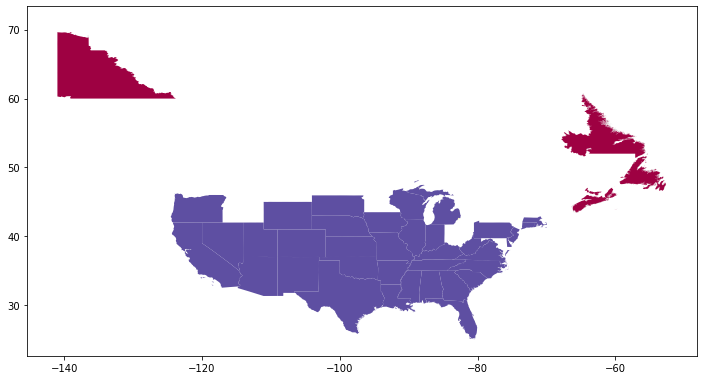

In [16]:
df_common.plot(column='COUNTRY',cmap='Spectral', figsize=(12, 12)) # ploting the polygons that have areas equal before and after groplanar


## Putting the areas into a separate dataframe

In [17]:
data = planar_enforced_area.area
data2 = non_planar_enforced_area.area
df = pd.DataFrame(data , columns = ['planar enforced area'])


In [18]:
df["non planar enforced area"]= non_planar_enforced_area.area

In [19]:
df['difference'] = df['planar enforced area'] - df['non planar enforced area'] #taking the difference

In [48]:
df.tail(20)

,planar enforced area,non planar enforced area,difference
44,11.870990,11.870990,0.000000e+00
45,14.598796,14.598796,0.000000e+00
46,7.794397,7.794397,0.000000e+00
47,13.517338,13.517338,0.000000e+00
48,11.224646,11.224646,0.000000e+00
49,13.347713,13.347713,0.000000e+00
50,16.927959,16.927959,0.000000e+00
51,93.614624,93.614624,1.136868e-12
52,132.618869,132.618886,-1.625585e-05
53,91.183156,91.184485,-1.328786e-03


### Ratio of PE and NPE AREAS

In [27]:
df['pe_area_over_npe_area'] = df['planar enforced area'] / df['non planar enforced area']
df

,planar enforced area,non planar enforced area,difference,pe_area_over_npe_area
0,15.543974,15.543974,7.105427e-15,1.000000
1,0.000533,0.000533,0.000000e+00,1.000000
2,0.058636,0.058636,0.000000e+00,1.000000
3,20.750731,20.749831,8.999905e-04,1.000043
4,45.131687,45.131677,9.660331e-06,1.000000
...,...,...,...,...
59,136.010019,136.017824,-7.805534e-03,0.999943
60,0.670316,0.670316,0.000000e+00,1.000000
61,206.177792,206.184961,-7.168346e-03,0.999965
62,90.424490,90.424490,-1.065814e-12,1.000000


### Subset Area Ratio greater then 1

In [28]:
df2 = df[df.pe_area_over_npe_area > 1.000000] # subset to look at areas increased
df2.shape

(14, 4)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

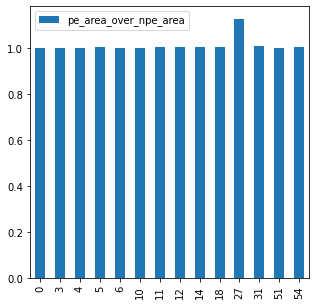

In [29]:
import matplotlib.pyplot as plt
plt.figure(); # plotting ratio of area>1 
df2[['pe_area_over_npe_area' ]].plot.bar(figsize=(5, 5))

### Subset Area Ratio less then 1

In [30]:
df3 = df[df.pe_area_over_npe_area < 1.000000]
df3.shape # subset to look at areas decreased

(7, 4)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

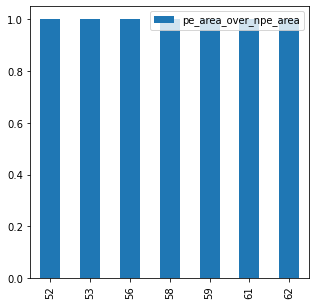

In [31]:
plt.figure(); # ratio of area <1
df3[['pe_area_over_npe_area' ]].plot.bar(figsize=(5, 5))

The areas change by a small fraction hence we dont see much of a change.

### Checking for Equality

In [35]:
# testing for equality/different ways

df['C'] = df.apply(lambda x : 1 if x['planar enforced area'] == x['non planar enforced area'] else 0, axis=1)
# where 1 is true and 0 is false

In [34]:
df.tail(21)

,planar enforced area,non planar enforced area,difference,pe_area_over_npe_area,C
43,12.897117,12.897117,0.000000e+00,1.000000,1
44,11.870990,11.870990,0.000000e+00,1.000000,1
45,14.598796,14.598796,0.000000e+00,1.000000,1
46,7.794397,7.794397,0.000000e+00,1.000000,1
47,13.517338,13.517338,0.000000e+00,1.000000,1
48,11.224646,11.224646,0.000000e+00,1.000000,1
49,13.347713,13.347713,0.000000e+00,1.000000,1
50,16.927959,16.927959,0.000000e+00,1.000000,1
51,93.614624,93.614624,1.136868e-12,1.000000,0
52,132.618869,132.618886,-1.625585e-05,1.000000,0


In [39]:
df_not_equal = df[df.C == 0] # subset to look at areas that are not equal

In [40]:
df_not_equal.shape # there are 21 polygons that are different

(21, 5)

In [41]:
df_not_equal.head(21)

,planar enforced area,non planar enforced area,difference,pe_area_over_npe_area,C
0,15.543974,15.543974,7.105427e-15,1.000000,0
3,20.750731,20.749831,8.999905e-04,1.000043,0
4,45.131687,45.131677,9.660331e-06,1.000000,0
5,9.583503,9.570609,1.289357e-02,1.001347,0
6,21.878359,21.874287,4.072578e-03,1.000186,0
10,24.392654,24.390738,1.916662e-03,1.000079,0
11,2.804467,2.794098,1.036905e-02,1.003711,0
12,25.609552,25.576939,3.261319e-02,1.001275,0
14,2.679751,2.677289,2.461385e-03,1.000919,0
18,13.887322,13.874597,1.272436e-02,1.000917,0


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

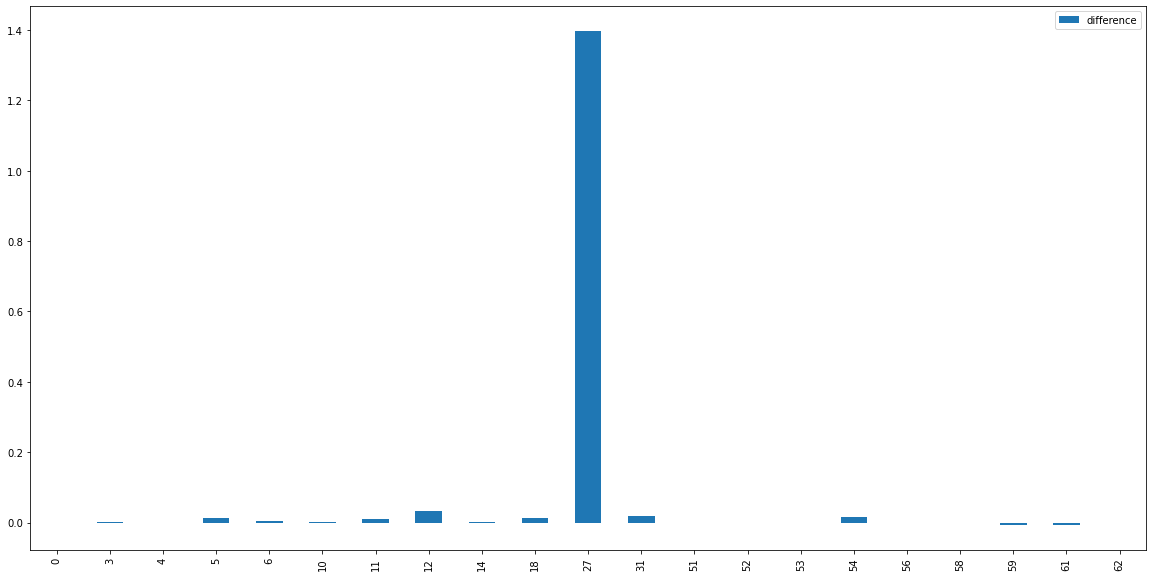

In [43]:
plt.figure(); # plotting the differences 
df_not_equal[['difference' ]].plot.bar(figsize=(20, 10))

Here we can see the changes in the areas, the 27 polygon (Ohio) has the most change. 

## Plotting Areas that Changed  

### RATIO OF AREAS >1

In [44]:
ratio_area_greater_1 = planar_enforced_area.iloc[['0','3','4','5','6', '10', '11', '12', '14','18', '27',
                                          '31','51', '54']]

<AxesSubplot:>

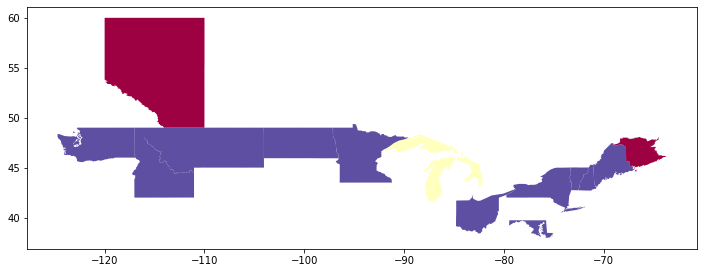

In [44]:
ratio_area_greater_1.plot(column= 'COUNTRY', cmap='Spectral', figsize=(12, 12))

Ratio of Areas >1 is mostly US states. Meaning the states in US have greater area after geoplanar.

### RATIO OF AREAS < 1

In [46]:
ratio_area_less_1 = planar_enforced_area.iloc[[ '52', '53', '56', '58', '59','61', '62']]

<AxesSubplot:>

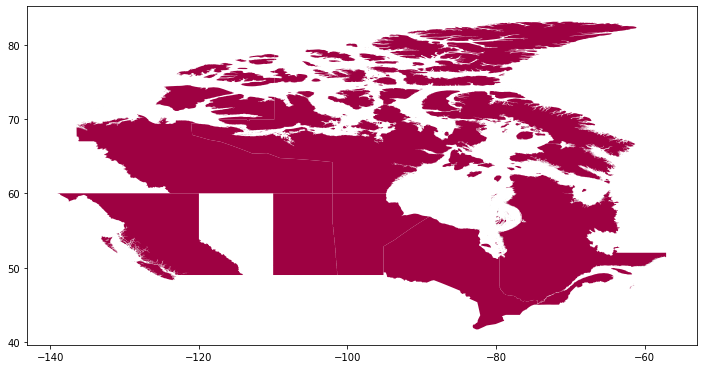

In [47]:
ratio_area_less_1.plot(column= 'COUNTRY', cmap='Spectral', figsize=(12, 12))

The areas gets smaller in Canada after application of geoplanar.

For the US the most changes occured near the border region. For canada the entire region has a slight change in the area of the polygons.

## CANADA- NorthWest Territories 
- Not at the border 
- Area ratio <1
- Centroids Geometries Equals Exact= True

In [48]:
NT_pe = planar_enforced_area[planar_enforced_area.NAME_1=="Northwest Territories"] 
NT_npe = non_planar_enforced_area[non_planar_enforced_area.NAME_1=="Northwest Territories"] 

In [49]:
NT_pe = NT_pe.explode()
NT_npe = NT_npe.explode()

In [50]:
print(NT_pe.iloc[3].geometry)

POLYGON ((-135.12083435 68.48124695, -135.12290955 68.48124695, -135.1244812 68.48176575, -135.1244812 68.48281097, -135.12290955 68.48332977, -135.12135315 68.48384857, -135.12031555 68.48490143, -135.1187439 68.48542023, -135.1166687 68.48542023, -135.11457825 68.48542023, -135.11250305 68.48542023, -135.1109314 68.48490143, -135.1098938 68.48384857, -135.1088562 68.48281097, -135.1083374 68.48124695, -135.1088562 68.47968292, -135.1104126 68.47916412, -135.11250305 68.47916412, -135.11457825 68.47916412, -135.1166687 68.47916412, -135.1182251 68.47968292, -135.1192627 68.48072815, -135.12083435 68.48124695))


In [51]:
print(NT_npe.iloc[3].geometry)

POLYGON ((-135.1098938 68.48384857, -135.1088562 68.48281097, -135.1083374 68.48124695, -135.1088562 68.47968292, -135.1104126 68.47916412, -135.11250305 68.47916412, -135.11457825 68.47916412, -135.1166687 68.47916412, -135.1182251 68.47968292, -135.1192627 68.48072815, -135.12083435 68.48124695, -135.12290955 68.48124695, -135.1244812 68.48176575, -135.1244812 68.48281097, -135.12290955 68.48332977, -135.12135315 68.48384857, -135.12031555 68.48490143, -135.1187439 68.48542023, -135.1166687 68.48542023, -135.11457825 68.48542023, -135.11250305 68.48542023, -135.1109314 68.48490143, -135.1098938 68.48384857))


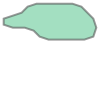

In [52]:
NT_pe.iloc[3].geometry

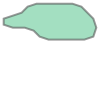

In [53]:
NT_npe.iloc[3].geometry

<AxesSubplot:>

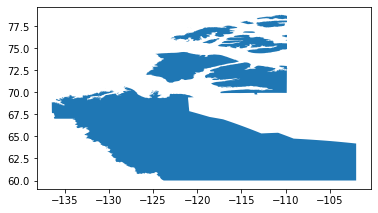

In [98]:
NT_pe.tail(1000).plot()

<AxesSubplot:>

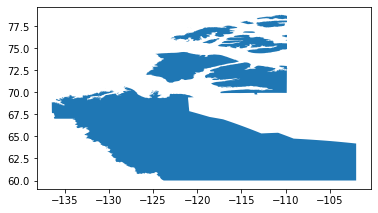

In [99]:
NT_npe.tail(1000).plot()

### Geoms equals exact

In [54]:
NT_npe.shape

(1676, 23)

In [55]:
NT_npe.geometry.geom_equals_exact(NT_pe.geometry, tolerance=0.01).sum()

969

In [56]:
NT_npe.geometry.geom_equals_exact(NT_pe.geometry, tolerance=0.5).sum()

1674

## CANADA- Ontario 
- At the border
- Ratio of area <1
- Centroids Geometries Equals Exact= False

In [62]:
O_pe = planar_enforced_area[planar_enforced_area.NAME_1=="Ontario"] 
O_npe = non_planar_enforced_area[non_planar_enforced_area.NAME_1=="Ontario"] 

In [63]:
O_pe = O_pe.explode()
O_npe = O_npe.explode()

In [103]:
O_npe = non_planar_enforced_area[non_planar_enforced_area.NAME_1=="Ontario"] 

In [64]:
O_npe.iloc[10]

level_0                                                      56
COUNTRY                                                  CANADA
index                                                       8.0
AREA                                                        NaN
PERIMETER                                                   NaN
STATE_                                                      NaN
STATE_ID                                                    NaN
STATE_NAME                                                 None
STATE_FIPS                                                 None
SUB_REGION                                                 None
STATE_ABBR                                                 None
GID_0                                                       CAN
NAME_0                                                   Canada
GID_1                                                   CAN.9_1
NAME_1                                                  Ontario
VARNAME_1                               

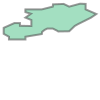

In [60]:
O_pe.iloc[10].geometry

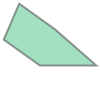

In [66]:
O_npe.iloc[10].geometry

<AxesSubplot:>

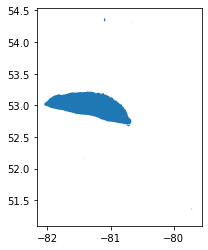

In [67]:
O_pe.tail(20).plot()

<AxesSubplot:>

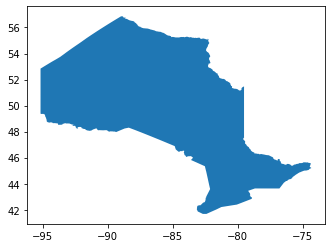

In [68]:
O_npe.tail(20).plot()

## US- Montana  
- At the border
- Ratio of Areas >1


In [69]:
m_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Montana"] 

In [70]:
m_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Montana"] 

In [71]:
m_pe = m_pe.explode()
m_pe.iloc[0]

level_0                                                       1
COUNTRY                                                      US
index                                                       1.0
AREA                                                     45.132
PERIMETER                                                34.527
STATE_                                                      2.0
STATE_ID                                                    2.0
STATE_NAME                                              Montana
STATE_FIPS                                                   30
SUB_REGION                                                  Mtn
STATE_ABBR                                                   MT
GID_0                                                      None
NAME_0                                                     None
GID_1                                                      None
NAME_1                                                     None
VARNAME_1                               

In [72]:
m_npe = m_npe.explode()
m_npe.iloc[0]

level_0                                                       1
COUNTRY                                                      US
index                                                       1.0
AREA                                                     45.132
PERIMETER                                                34.527
STATE_                                                      2.0
STATE_ID                                                    2.0
STATE_NAME                                              Montana
STATE_FIPS                                                   30
SUB_REGION                                                  Mtn
STATE_ABBR                                                   MT
GID_0                                                      None
NAME_0                                                     None
GID_1                                                      None
NAME_1                                                     None
VARNAME_1                               

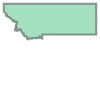

In [73]:
m_pe.iloc[0].geometry

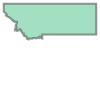

In [74]:
m_npe.iloc[0].geometry

<AxesSubplot:>

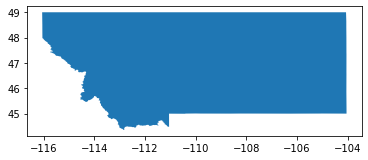

In [78]:
m_pe.tail(1).plot()

<AxesSubplot:>

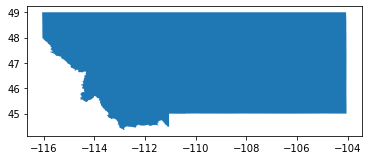

In [79]:
m_npe.tail(1).plot()

## US- Texas
- Not At the border
- Ratio of areas = 1
- Centroids Geometries Equals Exact= True

In [80]:
tx_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Texas"] 

In [81]:
tx_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Texas"] 

In [84]:
tx_pe = tx_pe.explode()
tx_npe = tx_npe.explode()

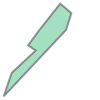

In [85]:
tx_pe.iloc[3].geometry

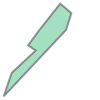

In [86]:
tx_npe.iloc[3].geometry

<AxesSubplot:>

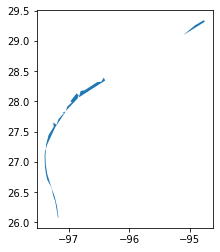

In [87]:
tx_pe.tail(5).plot()

<AxesSubplot:>

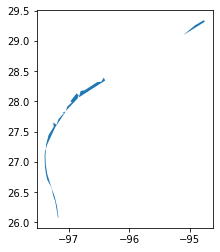

In [88]:
tx_npe.tail(5).plot()

## US- Maine
- At the border 
- Ratio of area >1 
- Centroids Geometries Equals Exact= False

In [89]:
maine_pe = planar_enforced_area[planar_enforced_area.STATE_NAME=="Maine"] 

In [90]:
maine_npe = non_planar_enforced_area[non_planar_enforced_area.STATE_NAME=="Maine"] 

In [91]:
maine_pe = maine_pe.explode()
maine_npe = maine_npe.explode()

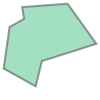

In [92]:
maine_pe.iloc[0].geometry

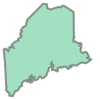

In [93]:
maine_npe.iloc[0].geometry

<AxesSubplot:>

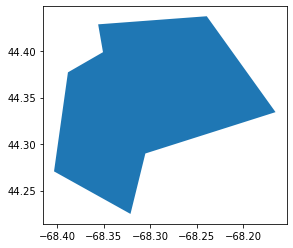

In [94]:
maine_npe.tail(1).plot()

<AxesSubplot:>

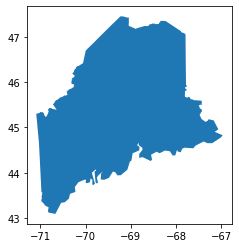

In [95]:
maine_pe.tail(1).plot()